In [10]:
#needed dependencies for io in Drive
!pip install -U -q PyDrive
!pip install h5py
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/CST/L98/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 biaffine_parser.py		   L98_2.sdp
'Biaffine Sentence_Length.ipynb'   large.sdp
 data.py			   model
 dm_500.sdp			  'Model Outputs'
 dm.sdp				   modules.py
 eval_dep.py			   multilingual_Parser.ipynb
'Evaluation Code.gdoc'		   __pycache__
'FINAL_Biaffine Parser.ipynb'	   readme
 indexed_data.py		   small.sdp
 indexing.py			  'Training Biaffine Semantic Dependency Parser.ipynb'
 l1-rerank.sdp			   train_or_use_parser.py
 l2-rerank.sdp			   Untitled0.ipynb


In [11]:
f = open("/content/drive/MyDrive/CST/L98/dm.sdp")
sentences = {}
current = ["", ""]
index = []
for line in f.readlines():
  if len(line) > 0:
      if line[0] == "#":
          if current[0] != "#":
              sentences[current[0]] = current[1]
              index.append(current[0])
          current[0] = int(line[1:])
          current[1] = ""
      else:
          current[1] += line

#sentences[current[0]] = current[1]

print(sentences[20001002])

1	Mr.	Mr.	NNP	-	+	_	_	_	_	_	_	_	_
2	Vinken	_generic_proper_ne_	NNP	-	-	compound	ARG1	_	_	_	_	_	_
3	is	is	VBZ	+	+	_	_	_	_	_	_	_	_
4	chairman	chairman	NN	-	-	_	ARG2	ARG1	_	_	_	_	_
5	of	of	IN	-	+	_	_	_	_	_	_	_	_
6	Elsevier	_generic_proper_ne_	NNP	-	-	_	_	ARG2	compound	_	_	_	appos
7	N.V.	N.V.	NNP	-	+	_	_	_	_	_	_	_	_
8	,	_	,	-	-	_	_	_	_	_	_	_	_
9	the	the	DT	-	+	_	_	_	_	_	_	_	_
10	Dutch	Dutch	JJ	-	+	_	_	_	_	_	_	_	_
11	publishing	publish	NN	-	+	_	_	_	_	_	_	_	_
12	group	group	NN	-	+	_	_	_	_	BV	ARG1	compound	_
13	.	_	.	-	-	_	_	_	_	_	_	_	_




In [3]:
print(index)

['', 20001001, 20001002, 20003001, 20003002, 20003003, 20003005, 20003007, 20003008, 20003009, 20003010, 20003011, 20003012, 20003013, 20003014, 20003015, 20003016, 20003017, 20003018, 20003019, 20003020, 20003021, 20003022, 20003023, 20003024, 20003025, 20003026, 20003027, 20003028, 20003029, 20003030, 20004001, 20004002, 20004003, 20004004, 20004005, 20004006, 20004007, 20004008, 20004009, 20004010, 20004011, 20004012, 20004013, 20004014, 20004015, 20004016, 20004017, 20005001, 20005002, 20005003, 20006001, 20006002, 20007002, 20007003, 20007004, 20008001, 20008003, 20008004, 20008005, 20008006, 20009001, 20009002, 20009003, 20009004, 20010001, 20010002, 20010003, 20010006, 20010007, 20010008, 20010010, 20010011, 20010012, 20010013, 20010015, 20010017, 20010018, 20010019, 20010020, 20011001, 20011002, 20011004, 20011005, 20011006, 20011007, 20011008, 20012002, 20012004, 20012005, 20012006, 20012007, 20012008, 20012010, 20012012, 20012013, 20012014, 20012015, 20012016, 20013002, 20013

We randomly generate a validation set of the remaining 4003 sentences. We will use the remaining 30 000 sentences as our training set.

In [5]:
import random
n = 700
random.seed(10)
index_random = random.sample(index,n) # validation set, randomly generated

# **Inspecting Sentence Length in SemEval 2014 Training Dataset**

We now order all the sentences in the training data by forming a dictionary of sentence indices with strings.

In [ ]:
with open("/content/drive/MyDrive/CST/L98/dm.sdp", 'r') as file:
    sentences_words = {}
    current_id = None
    for line in file:
        if line.startswith("#"):
            current_id = int(line.split("#")[1])
        else:
            # Split the line by tabs
            parts = line.split("\t")
            # Get the first column value
            first_column_value = parts[1] if len(parts) > 1 else ""
            # Store the association in the dictionary
            if current_id is not None:
                sentences_words[current_id] = sentences_words.get(current_id, "") + " " + first_column_value

In [ ]:
print(sentences_words[20003014])
print(sentences[20003014])

 Four of the five surviving workers have asbestos-related diseases , including three with recently diagnosed cancer . 
1	Four	four	CD	-	+	_	_	_	_	ARG1	_	_	_	_	_
2	of	of	IN	-	-	_	_	_	_	_	_	_	_	_	_
3	the	the	DT	-	+	_	_	_	_	_	_	_	_	_	_
4	five	five	CD	-	+	_	_	_	_	_	_	_	_	_	_
5	surviving	survive	VBG	-	+	_	_	_	_	_	_	_	_	_	_
6	workers	worker	NNS	-	-	ARG1	BV	ARG1	ARG1	_	_	_	_	_	_
7	have	have	VBP	-	+	_	_	_	_	_	_	subord	_	_	_
8	asbestos-related	relate	JJ	-	+	_	_	_	_	_	_	_	_	_	_
9	diseases	disease	NNS	-	-	_	_	_	_	ARG2	ARG2	_	_	_	_
10	,	_	,	-	-	_	_	_	_	_	_	_	_	_	_
11	including	include	VBG	+	+	_	_	_	_	_	_	_	_	_	_
12	three	three	CD	-	-	_	_	_	_	_	_	ARG2	ARG1	_	_
13	with	with	IN	-	+	_	_	_	_	_	_	_	_	_	_
14	recently	recently	RB	-	+	_	_	_	_	_	_	_	_	_	_
15	diagnosed	diagnose	VBN	-	+	_	_	_	_	_	_	_	_	ARG1	_
16	cancer	cancer	NN	-	-	_	_	_	_	_	_	_	ARG2	_	ARG2
17	.	_	.	-	-	_	_	_	_	_	_	_	_	_	_




We create a list of ordered indices sorted based on the length of the sentences in the training data. The longest sentence in the training corpus consists of 396 characters.

In [ ]:
index_ordered = sorted(sentences_words, key=lambda index: len(str(sentences_words[index])), reverse=True)

In [ ]:
print(index_ordered)
print(len(sentences_words[22059042]))
print(sentences_words[22059042])
print(sentences[22059042])

[22059042, 20107009, 20045027, 20985008, 20224037, 21793005, 21143007, 21633003, 21687027, 20360012, 21695030, 20778008, 20107010, 20590030, 21269017, 20601028, 22059003, 20094013, 20470004, 21574079, 21693021, 20240002, 20107013, 20108040, 20275025, 20812005, 21849030, 20101002, 20465077, 21017017, 20111020, 20571015, 21405013, 21809017, 21996042, 21156005, 20719005, 21316020, 21824047, 21591010, 21760015, 22013014, 20043020, 20288019, 20629067, 22034025, 21970031, 20578018, 21026039, 21640015, 20003020, 20472022, 21022024, 21047018, 20197001, 20275003, 20484003, 20990013, 21267033, 21572068, 21147009, 21314033, 21571007, 21667001, 21824040, 20360021, 20527003, 21078006, 20039009, 20439018, 20439020, 21307002, 20314037, 20440005, 21007018, 20101016, 20328023, 21495009, 21567053, 20105010, 20937008, 21253025, 20349026, 21017019, 21611006, 21695001, 20164006, 20259016, 20488014, 20584046, 21349006, 21554010, 21803019, 20404006, 20756037, 21634061, 21696017, 20953011, 21669005, 20590029,

We inspect the ten longest sentences in the training data. They are all above 300 characters long, including complex syntactico-smemantic constructions.

In [ ]:
first_ten_items = index_ordered[:10]
print(first_ten_items)
for item in first_ten_items:
  print(sentences_words[item])
  print(len(sentences_words[item]))

[22059042, 20107009, 20045027, 20985008, 20224037, 21793005, 21143007, 21633003, 21687027, 20360012]
 In this light , the comparative advantages of legislative law-making become clear : ( 1 ) Before it acts , the legislature typically will hear the views of representatives of all those affected by its decision , not just the immediate parties before the court ; and ( 2 ) the legislature can frame “ bright line ” standards that create less uncertainty than the fact-bound decisions of courts . 
396
 The department would be required to block the buy-out if the acquisition is likely to financially weaken a carrier so that safety would be impaired ; its ability to compete would be sharply diminished ; it would be put into foreign control ; or if the transaction would result in the sale of airline-related assets – unless selling such assets had an overriding public benefit . 
380
 Because many of these subskills – the symmetry of geometrical figures , metric measurement of volume , or pie an

We inspect the shortest 10 utterances annotated in the training corpus. By inspection, we can see that they are typically single-word utterances (e.g., exclamatives or discourse markers).

In [ ]:
last_ten_items = index_ordered[-10:]
print(last_ten_items)
for item in last_ten_items:
  print(sentences[item])

[21591001, 21778011, 21778015, 21778021, 21778097, 21778119, 21778131, 20052005, 21625003, 21778066]
1	Ing	_generic_proper_ne_	NNP	+	-
2	.	_	.	-	-


1	Wow	wow	UH	+	-
2	!	_	.	-	-


1	JKD	JKD	NNP	+	-
2	:	_	:	-	-


1	HRH	HRH	NNP	+	-
2	:	_	:	-	-


1	KIM	Kim	NNP	+	-
2	:	_	:	-	-


1	HLR	HLR	NNP	+	-
2	:	_	:	-	-


1	FIG	_generic_proper_ne_	NNP	+	-
2	:	_	:	-	-


1	TV	tv	NN	+	-
2	:	_	:	-	-


1	No	no	DT	+	-
2	?	_	.	-	-


1	RD	RD	NNP	+	-
2	:	_	:	-	-




We now plot a graph to show the distribution of sentence lengths in the corpus.

In [ ]:
string_lengths = {key: len(value) for key, value in sentences_words.items()}


In [ ]:
length = list(string_lengths.values())
print(length)

[89, 72, 194, 183, 157, 56, 46, 126, 132, 144, 183, 97, 113, 118, 135, 121, 206, 124, 253, 302, 108, 105, 83, 109, 79, 188, 128, 190, 73, 45, 137, 189, 100, 138, 163, 119, 202, 180, 110, 88, 101, 150, 60, 153, 130, 85, 131, 140, 88, 63, 145, 117, 112, 96, 73, 127, 109, 99, 134, 86, 149, 102, 114, 74, 170, 17, 119, 171, 164, 34, 91, 101, 157, 93, 101, 219, 106, 115, 85, 173, 196, 149, 115, 107, 127, 45, 152, 108, 60, 265, 51, 134, 227, 166, 80, 138, 112, 71, 270, 97, 38, 81, 149, 125, 192, 50, 165, 207, 177, 188, 160, 134, 123, 99, 91, 183, 117, 80, 151, 121, 144, 98, 71, 184, 164, 95, 74, 114, 187, 93, 71, 72, 74, 183, 138, 172, 90, 208, 125, 123, 112, 79, 134, 56, 159, 173, 125, 55, 64, 108, 142, 181, 44, 48, 82, 190, 79, 195, 101, 104, 48, 31, 111, 127, 87, 85, 76, 73, 87, 54, 83, 36, 207, 146, 283, 188, 99, 230, 132, 197, 66, 78, 235, 70, 139, 137, 171, 116, 150, 131, 165, 84, 150, 84, 100, 206, 76, 153, 85, 74, 50, 113, 56, 66, 117, 43, 196, 116, 129, 141, 104, 110, 160, 123, 58, 8

/usr/local/lib/python3.10/dist-packages/tikzplotlib/_cleanfigure.py:200: UserWarning: Cleaning Bar Container (bar plot) is not supported yet.
  warnings.warn("Cleaning Bar Container (bar plot) is not supported yet.")


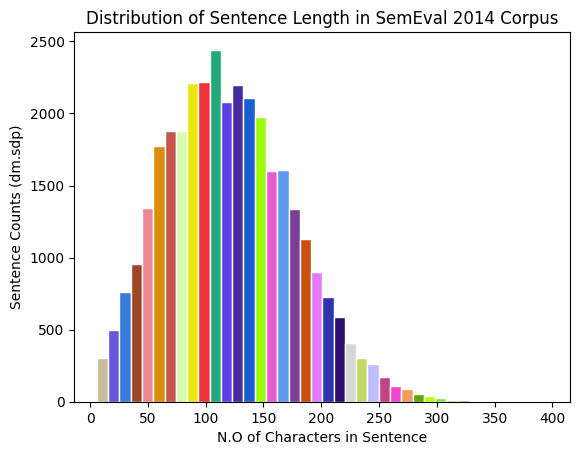

In [ ]:
!pip install tikzplotlib
import tikzplotlib
import random
import string
fig, ax = plt.subplots()
ax.set_title("Distribution of Sentence Length in SemEval 2014 Corpus")
ax.set_xlabel('N.O of Characters in Sentence')
ax.set_ylabel('Sentence Counts (dm.sdp)')
data = np.random.rand(1000)
N, bins, patches = ax.hist(a, edgecolor='white', bins=40, linewidth=1)
for i in range(len(N)):
   patches[i].set_facecolor("#" + ''.join(random.choices("ABCDEF" + string.digits, k=6)))
tikzplotlib.clean_figure()
tikzplotlib.save("mytikz.tex", flavor="context")

# **Training SMALL and LARGE**

Training Large

In [12]:
!pip install sacremoses
!python3 "/content/drive/MyDrive/CST/L98/train_or_use_parser.py" train "/content/drive/MyDrive/CST/L98/large.sdp" "/content/drive/MyDrive/CST/L98/model/large/" -g sdp -v "/content/drive/MyDrive/CST/L98/dm_500.sdp" -e loss

2023-12-10 21:49:44.354423: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 21:49:44.354474: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 21:49:44.354509: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 21:49:45.540077: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
There are 1 GPU(s) available.
We will use GPU 0 (Tesla T4) of compute capability 7.5 with 15.84Gb total memory.

loading sentences...
Max sentence length: {'train': 71}
Max sentence length: {'dev': 56}
indices...
indexing data...
model.sa

Testing Large

In [13]:
!python3 "/content/drive/MyDrive/CST/L98/train_or_use_parser.py" test "/content/drive/MyDrive/CST/L98/l1-rerank.sdp" "/content/drive/MyDrive/CST/L98/model/large" -g sdp --out_parsed_file training.txt

2023-12-10 22:35:14.848602: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 22:35:14.848663: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 22:35:14.848704: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 22:35:16.271623: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Parsing /content/drive/MyDrive/CST/L98/l1-rerank.sdp with /content/drive/MyDrive/CST/L98/model/large/model ...
loaded model /content/drive/MyDrive/CST/L98/model/large/model
Max sentence length: {'toparse': 63}
parsing and evaluating conll

In [14]:
!python3 "/content/drive/MyDrive/CST/L98/eval_dep.py" training.txt.l

ALL UR 46.36 UP 70.93 UF 56.08
ALL LR 43.13 LP 65.98 LF 52.16
>40 UR 54.42 UP 70.68 UF 61.50
>40 LR 51.15 LP 66.43 LF 57.80
LABEL          ARG1 GOLD DIST:  0.78 (MAD  2.47) PRED DIST:  0.05 (MAD  2.03)
LABEL          ARG1 GOLD DIR :  0.24 (MAD  0.94) PRED DIR :  0.08 (MAD  0.96)
LABEL          ARG2 GOLD DIST: -1.79 (MAD  1.25) PRED DIST: -1.90 (MAD  1.02)
LABEL          ARG2 GOLD DIR : -0.85 (MAD  0.27) PRED DIR : -0.86 (MAD  0.25)
LABEL          ARG3 GOLD DIST: -2.75 (MAD  1.77) PRED DIST: -2.56 (MAD  0.83)
LABEL          ARG3 GOLD DIR : -0.90 (MAD  0.19) PRED DIR : -0.98 (MAD  0.04)
LABEL          ARG4 GOLD DIST: -1.50 (MAD  3.50) PRED DIST:  0.00 (MAD  0.00)
LABEL          ARG4 GOLD DIR : -0.73 (MAD  0.47) PRED DIR :  0.00 (MAD  0.00)
LABEL            BV GOLD DIST: -1.39 (MAD  0.53) PRED DIST: -1.41 (MAD  0.59)
LABEL            BV GOLD DIR : -1.00 (MAD  0.00) PRED DIR : -0.98 (MAD  0.03)
LABEL            BV : proportion of odd direction in predicted arcs :  0.86 (34 / 3960)
LABEL   

In [15]:
!python3 "/content/drive/MyDrive/CST/L98/train_or_use_parser.py" test "/content/drive/MyDrive/CST/L98/l2-rerank.sdp" "/content/drive/MyDrive/CST/L98/model/" -g sdp --out_parsed_file l2.txt

2023-12-10 22:38:12.537769: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 22:38:12.537829: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 22:38:12.537874: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 22:38:13.787539: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Parsing /content/drive/MyDrive/CST/L98/l2-rerank.sdp with /content/drive/MyDrive/CST/L98/model//model ...
loaded model /content/drive/MyDrive/CST/L98/model//model
Max sentence length: {'toparse': 59}
parsing and evaluating conll file /con

In [16]:
!python3 "/content/drive/MyDrive/CST/L98/eval_dep.py" l2.txt.l

ALL UR 78.17 UP 77.46 UF 77.81
ALL LR 72.43 LP 71.78 LF 72.10
>40 UR 63.75 UP 76.92 UF 69.71
>40 LR 60.00 LP 72.40 LF 65.62
LABEL          ARG1 GOLD DIST:  0.85 (MAD  2.41) PRED DIST:  0.53 (MAD  2.33)
LABEL          ARG1 GOLD DIR :  0.26 (MAD  0.93) PRED DIR :  0.21 (MAD  0.96)
LABEL          ARG2 GOLD DIST: -1.68 (MAD  1.44) PRED DIST: -1.80 (MAD  1.23)
LABEL          ARG2 GOLD DIR : -0.83 (MAD  0.32) PRED DIR : -0.85 (MAD  0.28)
LABEL          ARG3 GOLD DIST: -2.44 (MAD  2.29) PRED DIST: -2.26 (MAD  1.25)
LABEL          ARG3 GOLD DIR : -0.80 (MAD  0.37) PRED DIR : -0.97 (MAD  0.07)
LABEL          ARG4 GOLD DIST: -2.38 (MAD  2.79) PRED DIST:  0.00 (MAD  0.00)
LABEL          ARG4 GOLD DIR : -0.69 (MAD  0.52) PRED DIR :  0.00 (MAD  0.00)
LABEL            BV GOLD DIST: -1.39 (MAD  0.53) PRED DIST: -1.39 (MAD  0.54)
LABEL            BV GOLD DIR : -1.00 (MAD  0.00) PRED DIR : -1.00 (MAD  0.00)
LABEL            BV : proportion of odd direction in predicted arcs :  0.09 (3 / 3515)
LABEL    

Training SMALL

In [18]:
!python3 "/content/drive/MyDrive/CST/L98/train_or_use_parser.py" train "/content/drive/MyDrive/CST/L98/small.sdp" "/content/drive/MyDrive/CST/L98/model/small/" -g sdp -v "/content/drive/MyDrive/CST/L98/dm_500.sdp" -e loss

2023-12-10 23:02:55.917587: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 23:02:55.917648: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 23:02:55.917688: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 23:02:57.117046: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
There are 1 GPU(s) available.
We will use GPU 0 (Tesla T4) of compute capability 7.5 with 15.84Gb total memory.

loading sentences...
Max sentence length: {'train': 26}
Max sentence length: {'dev': 56}
indices...
indexing data...
# model_

Testing SMALL

In [19]:
!python3 "/content/drive/MyDrive/CST/L98/train_or_use_parser.py" test "/content/drive/MyDrive/CST/L98/l1-rerank.sdp" "/content/drive/MyDrive/CST/L98/model/small" -g sdp --out_parsed_file small_training.txt

2023-12-10 23:30:54.090767: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 23:30:54.090835: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 23:30:54.090889: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 23:30:55.912108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Parsing /content/drive/MyDrive/CST/L98/l1-rerank.sdp with /content/drive/MyDrive/CST/L98/model/small/model ...
loaded model /content/drive/MyDrive/CST/L98/model/small/model
Max sentence length: {'toparse': 63}
parsing and evaluating conll

In [20]:
!python3 "/content/drive/MyDrive/CST/L98/eval_dep.py" small_training.txt.l

ALL UR 44.48 UP 63.49 UF 52.31
ALL LR 41.31 LP 58.97 LF 48.58
>40 UR 20.31 UP 46.60 UF 28.29
>40 LR 18.73 LP 42.98 LF 26.09
LABEL          ARG1 GOLD DIST:  0.78 (MAD  2.47) PRED DIST:  0.64 (MAD  2.30)
LABEL          ARG1 GOLD DIR :  0.24 (MAD  0.94) PRED DIR :  0.25 (MAD  0.92)
LABEL          ARG2 GOLD DIST: -1.79 (MAD  1.25) PRED DIST: -1.37 (MAD  2.04)
LABEL          ARG2 GOLD DIR : -0.85 (MAD  0.27) PRED DIR : -0.63 (MAD  0.60)
LABEL          ARG3 GOLD DIST: -2.75 (MAD  1.77) PRED DIST:  0.00 (MAD  0.00)
LABEL          ARG3 GOLD DIR : -0.90 (MAD  0.19) PRED DIR :  0.00 (MAD  0.00)
LABEL          ARG4 GOLD DIST: -1.50 (MAD  3.50) PRED DIST:  0.00 (MAD  0.00)
LABEL          ARG4 GOLD DIR : -0.73 (MAD  0.47) PRED DIR :  0.00 (MAD  0.00)
LABEL            BV GOLD DIST: -1.39 (MAD  0.53) PRED DIST: -1.45 (MAD  0.84)
LABEL            BV GOLD DIR : -1.00 (MAD  0.00) PRED DIR : -0.93 (MAD  0.13)
LABEL            BV : proportion of odd direction in predicted arcs :  3.47 (169 / 4869)
LABEL  

In [21]:
!python3 "/content/drive/MyDrive/CST/L98/train_or_use_parser.py" test "/content/drive/MyDrive/CST/L98/l2-rerank.sdp" "/content/drive/MyDrive/CST/L98/model/small" -g sdp --out_parsed_file small_l2.txt

2023-12-10 23:33:25.645699: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 23:33:25.645761: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 23:33:25.645802: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 23:33:26.889302: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Parsing /content/drive/MyDrive/CST/L98/l2-rerank.sdp with /content/drive/MyDrive/CST/L98/model/small/model ...
loaded model /content/drive/MyDrive/CST/L98/model/small/model
Max sentence length: {'toparse': 59}
parsing and evaluating conll

In [22]:
!python3 "/content/drive/MyDrive/CST/L98/eval_dep.py" small_l2.txt.l

ALL UR 43.30 UP 61.58 UF 50.84
ALL LR 40.18 LP 57.15 LF 47.19
>40 UR 17.79 UP 43.04 UF 25.18
>40 LR 16.12 LP 39.00 LF 22.81
LABEL          ARG1 GOLD DIST:  0.85 (MAD  2.41) PRED DIST:  0.64 (MAD  2.19)
LABEL          ARG1 GOLD DIR :  0.26 (MAD  0.93) PRED DIR :  0.27 (MAD  0.91)
LABEL          ARG2 GOLD DIST: -1.68 (MAD  1.44) PRED DIST: -1.31 (MAD  1.96)
LABEL          ARG2 GOLD DIR : -0.83 (MAD  0.32) PRED DIR : -0.63 (MAD  0.61)
LABEL          ARG3 GOLD DIST: -2.44 (MAD  2.29) PRED DIST:  0.00 (MAD  0.00)
LABEL          ARG3 GOLD DIR : -0.80 (MAD  0.37) PRED DIR :  0.00 (MAD  0.00)
LABEL          ARG4 GOLD DIST: -2.38 (MAD  2.79) PRED DIST:  0.00 (MAD  0.00)
LABEL          ARG4 GOLD DIR : -0.69 (MAD  0.52) PRED DIR :  0.00 (MAD  0.00)
LABEL            BV GOLD DIST: -1.39 (MAD  0.53) PRED DIST: -1.46 (MAD  0.81)
LABEL            BV GOLD DIR : -1.00 (MAD  0.00) PRED DIR : -0.94 (MAD  0.12)
LABEL            BV : proportion of odd direction in predicted arcs :  3.20 (102 / 3185)
LABEL  

# **Generating Training and Validation Datasets for Active Learning**

In [ ]:
training_index = [elem for elem in index_ordered if elem not in index_random] #training set, removing validation indices

In [ ]:
print(len(training_index)) #length of training set should be 34003

30000


Now we have a list of sentence indices ordered by length, we will partition this training set into three training sets ```SMALL``` and  ```MEDIUM``` and ```LARGE```.



In [ ]:
def divide_chunks(l, n):

    # looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]
n = 10000
x = list(divide_chunks(training_index, n))

[22059042, 20045027, 20985008, 20224037, 21793005, 21143007, 21633003, 20360012, 20778008, 20107010, 20590030, 21269017, 20601028, 22059003, 20094013, 20470004, 21574079, 21693021, 20240002, 20107013, 20108040, 20275025, 20812005, 21849030, 20101002, 20465077, 21017017, 20111020, 20571015, 21405013, 21809017, 21996042, 20719005, 21316020, 21824047, 21760015, 22013014, 20043020, 20288019, 20629067, 22034025, 21970031, 20578018, 21026039, 21640015, 20003020, 20472022, 21022024, 21047018, 20197001, 20484003, 20990013, 21267033, 21572068, 21147009, 21314033, 21571007, 21667001, 21824040, 20360021, 20527003, 21078006, 20039009, 20439018, 20439020, 21307002, 20314037, 20440005, 21007018, 20101016, 20328023, 21495009, 21567053, 20105010, 20937008, 21253025, 21017019, 21611006, 21695001, 20164006, 20259016, 20488014, 20584046, 21349006, 21554010, 21803019, 20404006, 20756037, 21634061, 21696017, 20953011, 20590029, 20990030, 21372010, 21615035, 21622019, 20648016, 20655002, 20937011, 21568055,

Generating LARGE

In [ ]:
large = x[0]

<class 'int'>


In [ ]:
import os
from google.colab import files
old_name = r"test.tex"
new_name = r"/large.sdp"
while True:
  with open('large.sdp', 'w') as f:
    try:
      for indices in large:
        f.write("#" + str(indices) + "\n")
        f.write(sentences[indices])
    except KeyError:
      continue

In [ ]:
files.download('large.sdp')

Generating MEDIUM

In [ ]:
medium = x[1]

In [ ]:
import os
from tqdm import tqdm
from google.colab import files
old_name = r"test.tex"
new_name = r"/medium.sdp"
while True:
  with open('medium.sdp', 'w') as f:
    try:
      for indices in tqdm(medium):
        f.write("#" + str(indices) + "\n")
        f.write(sentences[indices])
    except KeyError:
      continue

Generating SMALL

In [ ]:
small = x[2]
import os
from tqdm import tqdm
from google.colab import files
old_name = r"test.tex"
new_name = r"/small.sdp"
while True:
  with open('small.sdp', 'w') as f:
    try:
      for indices in tqdm(small):
        f.write("#" + str(indices) + "\n")
        f.write(sentences[indices])
    except KeyError:
      continue

Generating Validation Dataset

In [ ]:
val = index_random
import os
from tqdm import tqdm
from google.colab import files
old_name = r"test.tex"
new_name = r"/val.sdp"
while True:
  with open('val.sdp', 'w') as f:
    try:
      for indices in tqdm(val):
        f.write("#" + str(indices) + "\n")
        f.write(sentences[indices])
    except KeyError:
      continue